In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k=5
kmeans= KMeans(n_clusters=k, random_state=42, n_init=20)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [ ]:
X.shape

(2000, 2)

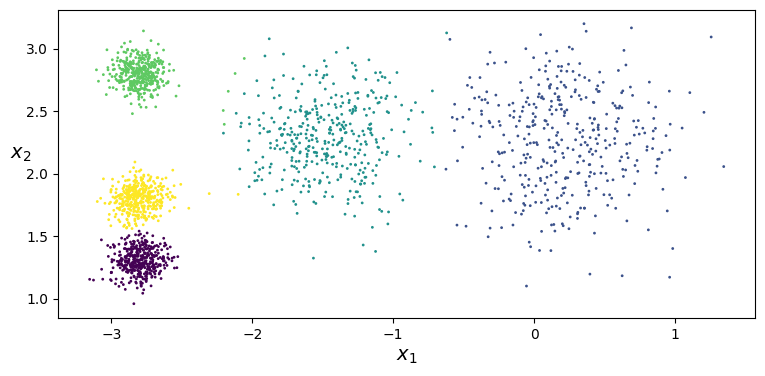

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel('$x_1$', fontsize=14)
  plt.ylabel('$x_2$', fontsize=14, rotation=0)

plt.figure(figsize=(9,4))
plot_clusters(X, y_pred)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [ ]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [ ]:
kmeans.transform(X_new)
# hansi classdan hansi mesafede oldugunu gosterir

array([[2.88633901, 0.32995317, 1.49439034, 2.9042344 , 2.81093633],
       [5.84236351, 2.80290755, 4.4759332 , 5.84739223, 5.80730058],
       [1.71086031, 3.29399768, 1.69136631, 0.29040966, 1.21475352],
       [1.21567622, 3.21806371, 1.54808703, 0.36159148, 0.72581411]])

In [ ]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [ ]:
kmeans.inertia_

211.59853725816828

In [ ]:
kmeans.score(X)

-211.59853725816828

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65945105712612

In [ ]:
# Elbow method
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

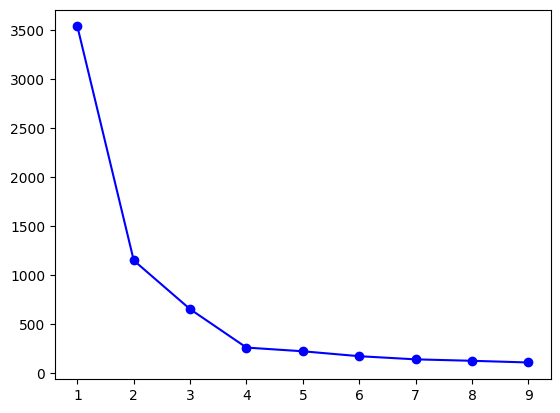

In [ ]:
plt.plot(range(1,10), inertias, 'bo-');

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

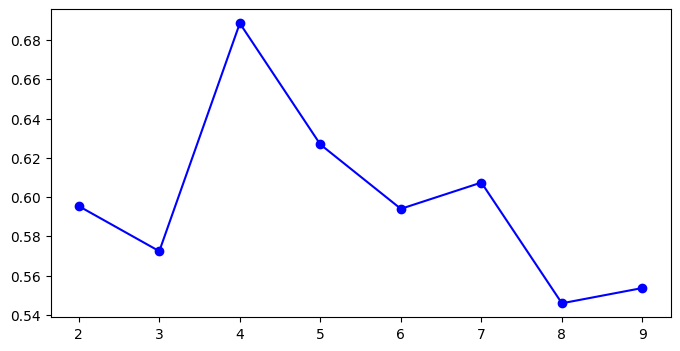

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(2,10), silhouette_scores, 'bo-');

In [ ]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path()/'images'/'unsupervised_learning'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH/filename

if not filepath.is_file():
  print('Downloading', filename)
  url = f'{homl3_root}/images/unsupervised_learning/{filename}'
  urllib.request.urlretrieve(url, filepath)

In [ ]:
filepath

PosixPath('images/unsupervised_learning/ladybug.png')

In [ ]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

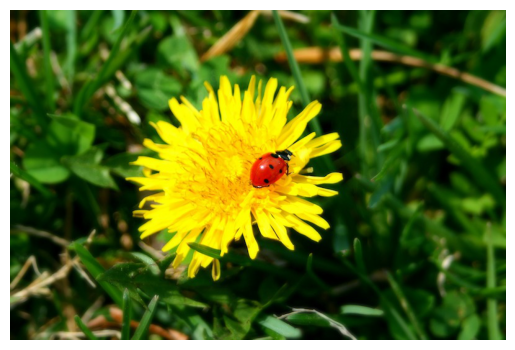

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

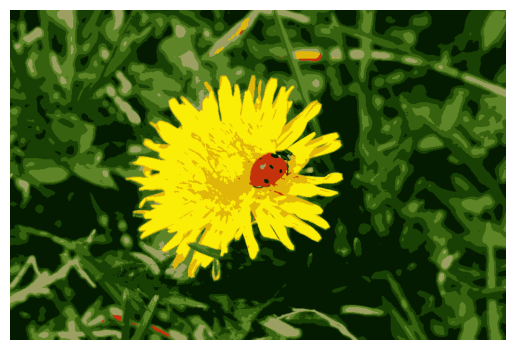

In [ ]:
plt.imshow(segmented_img/255)
plt.axis('off');

# SemiSupervisedLearning Clustering

In [ ]:
from sklearn.datasets import load_digits
np.random.seed(42)
X_digits, y_digits = load_digits(return_X_y = True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

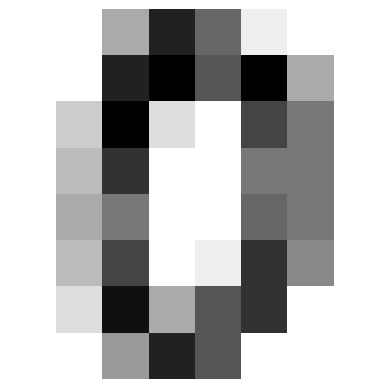

In [ ]:
plt.imshow(X_train[0].reshape(8,8), cmap='binary')
plt.axis('off')
plt.show();

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled=50
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.7581863979848866

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [ ]:
k=50
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

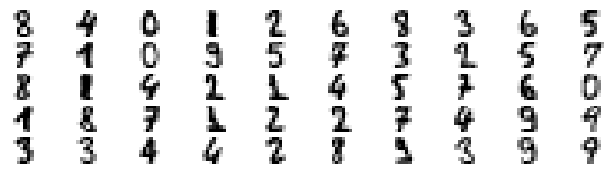

In [ ]:
plt.figure(figsize=(8,2))
plt.gray()
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10,10,index+1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap='binary')
    plt.axis('off')

plt.show();

In [ ]:
y_representative_digits = np.array([
   8,4,0,1,2,6,8,3,6,5,
   7,1,0,9,5,7,3,2,5,7,
   8,1,4,2,1,4,5,7,6,0,
   1,8,7,1,2,2,7,4,9,9,
   3,3,4,4,2,8,9,3,9,9
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8614609571788413

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  in_cluster = (kmeans.labels_==i)
  y_train_propagated[in_cluster] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8488664987405542

In [ ]:
(y_train == y_train_propagated).mean()

0.9478571428571428

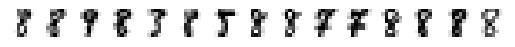

In [ ]:
for idx, image in enumerate(X_train[kmeans.labels_==45][:15]):
  plt.subplot(1,15, idx+1)
  plt.imshow(image.reshape(8,8),cmap ='binary')
  plt.axis('off')
plt.show();

In [ ]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_==i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster&above_cutoff]=-1

partially_propagated = (X_cluster_dist !=-1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test,y_test)

0.9118387909319899

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)